In [51]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn import preprocessing
from collections import deque
import random

df= pd.read_csv("TSLA.csv")
df = df.head(50)


#code snippets taken from https://pythonprogramming.net/normalizing-sequences-deep-learning-python-tensorflow-keras/
                                   
print(df.head())

       Date        Open        High         Low       Close   Adj Close  \
0  05.07.19  234.570007  235.449997  230.800003  233.100006  233.100006   
1  08.07.19  231.240005  232.250000  228.660004  230.339996  230.339996   
2  09.07.19  228.970001  231.000000  227.279999  230.059998  230.059998   
3  10.07.19  234.149994  238.940002  233.139999  238.919998  238.919998   
4  11.07.19  238.139999  241.500000  235.800003  238.600006  238.600006   

    Volume  
0  7065700  
1  5880500  
2  6190800  
3  9145700  
4  7514400  


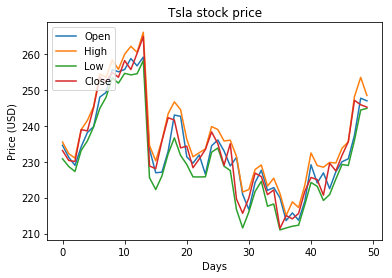

In [52]:
from matplotlib import pyplot as plt

plt.figure()
plt.plot(df["Open"])
plt.plot(df["High"])
plt.plot(df["Low"])
plt.plot(df["Close"])
plt.title('Tsla stock price')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open', 'High', 'Low', 'Close'], loc ='upper left')
plt.show ()

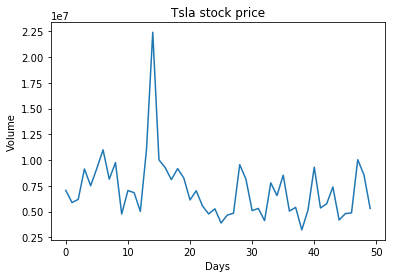

In [53]:
plt.figure()
plt.plot(df["Volume"])
plt.title('Tsla stock price')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [54]:
df.drop ("Date", axis ="columns", inplace=True)

for col in df.columns:
    df[col] = df[col].pct_change()
    df.dropna (inplace=True)
    
df.head()

,Open,High,Low,Close,Adj Close,Volume
6,0.034411,0.036841,0.021484,0.034356,0.034356,0.195598
7,0.005242,-0.003498,0.012538,-0.004418,-0.004418,-0.259189
8,0.025552,0.018854,0.021861,0.009826,0.009826,0.198270
9,-0.002425,-0.009911,-0.005763,-0.005179,-0.005179,-0.512069
10,0.002509,0.016461,0.010838,0.018301,0.018301,0.479358


In [55]:
data = []
values = df.values
seq_len = 4
dq = deque(maxlen = seq_len)
num_of_rows = values.shape[0]
for row_idx in range(num_of_rows):
    dq.append(values[row_idx, :])
    if len(dq) == seq_len and row_idx+1 < num_of_rows:
        current_close = values [row_idx+1, -3]
        data.append ([dq,current_close])
 
random.shuffle(data)
print(len(data))

40


In [63]:
X =[]
Y =[]
for x, y in data:
    X.append(x)
    Y.append(y)
    
X = np.array(X)
Y = np.array(Y)

print(X_train.shape)




(9, 4, 6)


In [73]:
model = tf.keras.models.Sequential()
from tensorflow.keras.layers import Dense, LSTM
nodes_per_layer = 5
model.add(LSTM(nodes_per_layer, input_shape =(seq_len, 6), return_sequences= True))
model.add(LSTM(nodes_per_layer, return_sequences= True))
model.add(LSTM(nodes_per_layer, return_sequences= False))
model.add(Dense(nodes_per_layer, activation='relu'))
model.add(Dense(1, activation='tanh'))

numbs_rows= len(data)
training_line = int(numbs_rows*0.8)
X_train = X[:training_line, :]
X_test = X[training_line:, :]

Y_train = Y[:training_line]
Y_test = Y[training_line:]

model.compile (optimizer = 'adam', loss = tf.keras.losses.MeanSquaredError(), metrics = ['accuracy'])
model.fit(X_train, Y_train, batch_size = 32, epochs = 50, validation_data = (X_test, Y_test))

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.0011 - accuracy: 0.0000e+00 - val_loss: 8.7585e-04 - val_accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 76ms/step - loss: 0.0011 - accuracy: 0.0000e+00 - val_loss: 7.3038e-04 - val_accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 102ms/step - loss: 0.0011 - accuracy: 0.0000e+00 - val_loss: 6.1104e-04 - val_accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 93ms/step - loss: 0.0011 - accuracy: 0.0000e+00 - val_loss: 5.6802e-04 - val_accuracy: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 91ms/step - loss: 0.0011 - accuracy: 0.0000e+00 - val_loss: 6.0269e-04 - val_accuracy: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 0s 88ms/step - loss: 0.0011 - accuracy: 0.0000e+00 - val_loss: 6.5835e-04 - val_accuracy: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 0s 97ms/step - loss: 0.0011 - accuracy: 0.000